In [7]:
import pandas as pd

# Path to CSV
data_path = 'data/raw/uber-raw-data-sep14.csv'

# Load dataset
data = pd.read_csv(data_path)

print("CSV loaded successfully!")
data.head()


CSV loaded successfully!


,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [8]:
# 1️⃣ Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load your Kaggle dataset
# Path from current working directory to raw CSV
data_path = 'data/raw/uber-raw-data-sep14.csv'
data = pd.read_csv(data_path)

# 3️⃣ Check first 5 rows
print("First 5 rows of the dataset:")
data.head()


First 5 rows of the dataset:


,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [9]:
# 1️⃣ Info about columns and data types
print("Dataset info:")
data.info()

# 2️⃣ Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# 3️⃣ Basic statistics for numeric columns
print("\nBasic statistics:")
data.describe()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB

Missing values per column:
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

Basic statistics:


,Lat,Lon
count,1.028136e+06,1.028136e+06
mean,4.073922e+01,-7.397182e+01
std,4.082861e-02,5.831413e-02
min,3.998970e+01,-7.477360e+01
25%,4.072040e+01,-7.399620e+01
50%,4.074180e+01,-7.398310e+01
75%,4.076120e+01,-7.396280e+01
max,4.134760e+01,-7.271630e+01


In [10]:
# 1️⃣ Convert Date/Time to datetime
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# 2️⃣ Remove duplicates
data = data.drop_duplicates()

# 3️⃣ Optional: remove invalid coordinates
data = data[(data['Lat'] != 0) & (data['Lon'] != 0)]

# Check cleaned data
print("Data after cleaning:")
data.head()


Data after cleaning:


,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [11]:
# Extract features for modeling
data['hour'] = data['Date/Time'].dt.hour
data['day_of_week'] = data['Date/Time'].dt.dayofweek  # Monday=0, Sunday=6
data['month'] = data['Date/Time'].dt.month

# Preview data
print("Data after feature engineering:")
data.head()


Data after feature engineering:


,Date/Time,Lat,Lon,Base,hour,day_of_week,month
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,0,0,9
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,0,0,9
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,0,0,9
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,0,0,9
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,0,0,9


In [12]:
# Group by Base (zone) and hour to calculate ride counts
ride_counts = data.groupby(['Base', 'hour']).size().reset_index(name='ride_count')

# Preview aggregated data
print("Aggregated ride counts:")
ride_counts.head()


Aggregated ride counts:


,Base,hour,ride_count
0,B02512,0,656
1,B02512,1,369
2,B02512,2,226
3,B02512,3,215
4,B02512,4,291


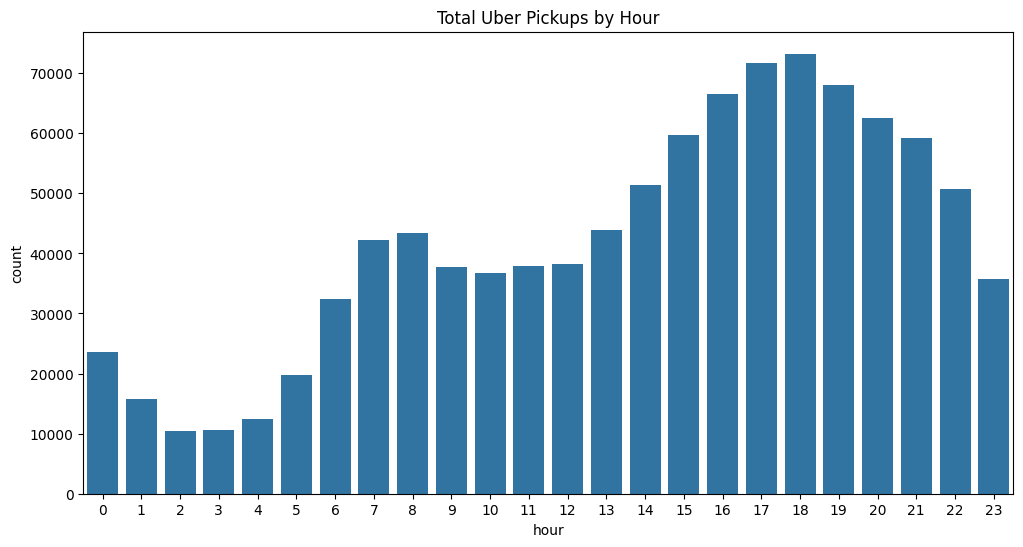

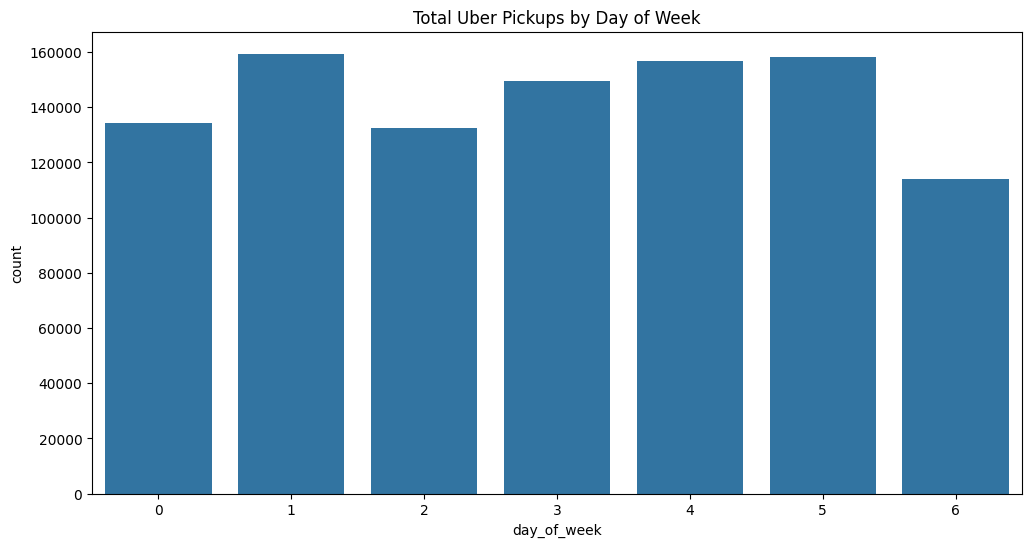

In [13]:
# Total pickups by hour
plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=data)
plt.title('Total Uber Pickups by Hour')
plt.show()

# Total pickups by day of week
plt.figure(figsize=(12,6))
sns.countplot(x='day_of_week', data=data)
plt.title('Total Uber Pickups by Day of Week')
plt.show()


In [14]:
import os

# Ensure processed folder exists
if not os.path.exists('data/processed'):
    os.makedirs('data/processed')

# Save aggregated data for ML modeling
processed_path = 'data/processed/uber_processed.csv'
ride_counts.to_csv(processed_path, index=False)
print(f"✅ Processed data saved successfully at {processed_path}")


✅ Processed data saved successfully at data/processed/uber_processed.csv


In [15]:
import os

# Ensure processed folder exists
if not os.path.exists('data/processed'):
    os.makedirs('data/processed')

# Save processed CSV
processed_path = 'data/processed/uber_processed.csv'
ride_counts.to_csv(processed_path, index=False)
print(f"✅ Processed data saved successfully at {processed_path}")


✅ Processed data saved successfully at data/processed/uber_processed.csv
